In [3]:
import numpy as np 
import pandas as pd
import requests
import matplotlib.pyplot as plt
from scipy.stats import boxcox

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', delimiter=',')
df.head()


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


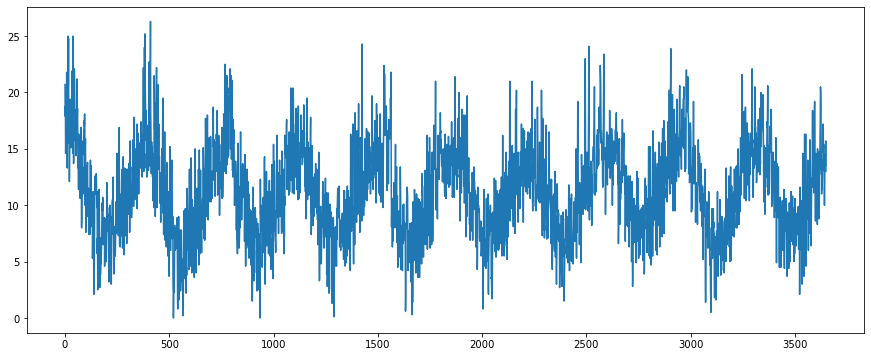

In [24]:
plt.figure(figsize=(15, 6))
df['Temp'].plot();


<ipython-input-25-7e73b327268a>:2: RuntimeWarning: divide by zero encountered in log
  reg_temp = np.log(df[['Temp']].pct_change(1) + 1)


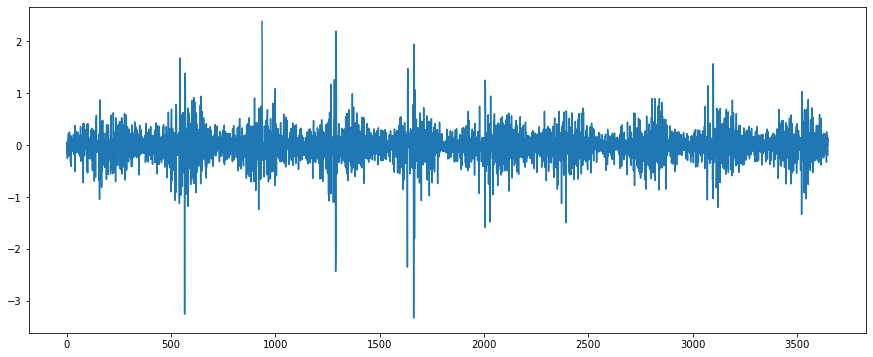

In [25]:
plt.figure(figsize=(15, 6))
reg_temp = np.log(df[['Temp']].pct_change(1) + 1)
plt.plot(reg_temp);


In [29]:
df['Temp_SMA7'] = df['Temp'].rolling(7).mean()
type(df['Temp'].rolling(7))
df.head(10)

pandas.core.window.rolling.Rolling

,Date,Temp,Temp_SMA7
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,NaN
2,1981-01-03,18.8,NaN
3,1981-01-04,14.6,NaN
4,1981-01-05,15.8,NaN
5,1981-01-06,15.8,NaN
6,1981-01-07,15.8,17.057143
7,1981-01-08,17.4,16.585714
8,1981-01-09,21.8,17.142857
9,1981-01-10,20.0,17.314286


<Figure size 1080x432 with 0 Axes>

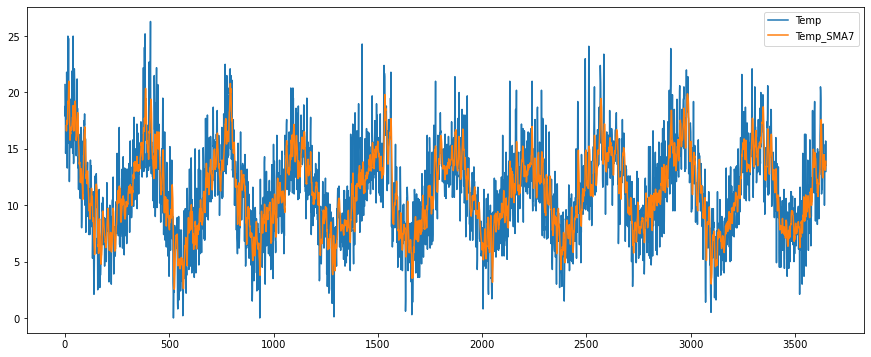

In [36]:
plt.figure(figsize=(15, 6))
plt.plot(df[['Temp', 'Temp_SMA7']])
plt.legend(['Temp', 'Temp_SMA7'])


<Figure size 1080x432 with 0 Axes>

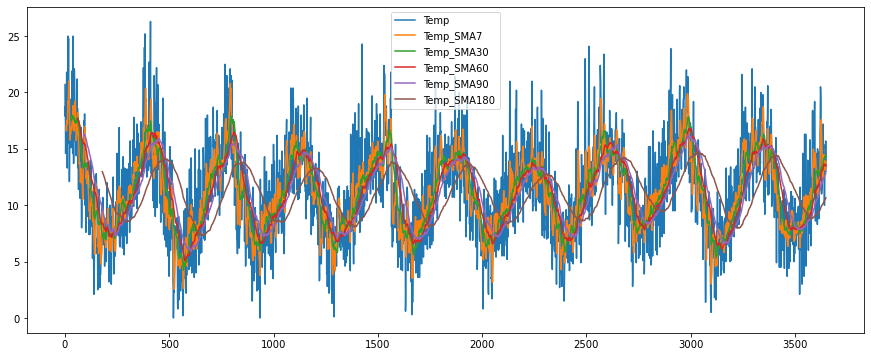

In [40]:
df['Temp_SMA30'] = df['Temp'].rolling(30).mean()
df['Temp_SMA60'] = df['Temp'].rolling(60).mean()
df['Temp_SMA90'] = df['Temp'].rolling(90).mean()
df['Temp_SMA180'] = df['Temp'].rolling(180).mean()


plt.figure(figsize=(15, 6))
plt.plot(df.iloc[:, 1:df.shape[1]])
plt.legend(df.columns[1:].tolist())
